In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Device configuration
device = torch.device( 'cuda'  if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 2
batch_size = 4
learning_rate = 0.001

In [11]:

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='.\data', transform=transform,
                                             train=True, download=True)

test_dataset = torchvision.datasets.CIFAR10(root='.\data', transform=transform,
                                            train=False)

train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,shuffle=True)


Files already downloaded and verified


In [12]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

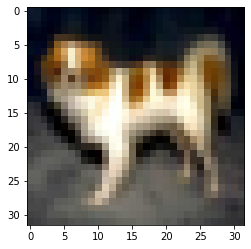

In [13]:
# get some random training images
dataiter  = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cnn1 = nn.Conv2d(3,6,5)
        self.pooling = nn.MaxPool2d(2,2)
        self.cnn2 = nn.Conv2d(6,16,5)

        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)


    def forward(self, x):
          # -> n, 3, 32, 32
          # -> n, 6, 14, 14
          # -> n, 16, 5, 5
          # -> n, 400
          # -> n, 120
          # -> n, 84
          # -> n, 10
        return x




### Training Loop

In [ ]:

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
#with 